# Convolution Operation

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
pad = 5 // 3
pad


1

In [3]:
Sobel_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

In [4]:
Avg_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])


In [5]:
img = cv.imread('CoverImages/lena.tiff',0)

In [6]:
def convolution(image, kernel):
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            pixel_sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    pixel_sum += padded_image[i + m][j + n] * kernel[m][ n]
            result[i][j] = pixel_sum

    return result

In [7]:
convolD = convolution(img,Sobel_kernel)
np.shape(convolD)

(512, 512)

In [8]:
convolD

array([[230,   0, 253, ..., 208, 130,  47],
       [136,   0, 252, ..., 192,  88, 148],
       [136,   0, 252, ..., 192,  88, 148],
       ...,
       [176,  29,  19, ...,   3, 242, 109],
       [175,  40,  25, ...,  15,   6,  97],
       [132,  33,  21, ...,  15,  12, 197]], dtype=uint8)

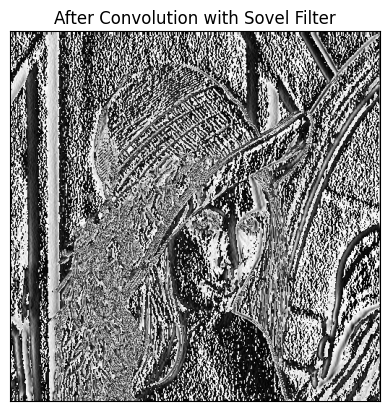

In [9]:
plt.imshow(convolD, cmap='gray')
plt.title("After Convolution with Sovel Filter")
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
convol_Avg = convolution(img,Avg_kernel)
np.shape(convol_Avg)

(512, 512)

In [11]:
convol_Avg

array([[ 72, 108, 107, ..., 110, 100,  62],
       [108, 162, 161, ..., 165, 151,  94],
       [108, 162, 161, ..., 165, 151,  94],
       ...,
       [ 29,  46,  48, ..., 101, 101,  67],
       [ 29,  46,  48, ..., 102, 104,  69],
       [ 19,  31,  33, ...,  68,  70,  47]], dtype=uint8)

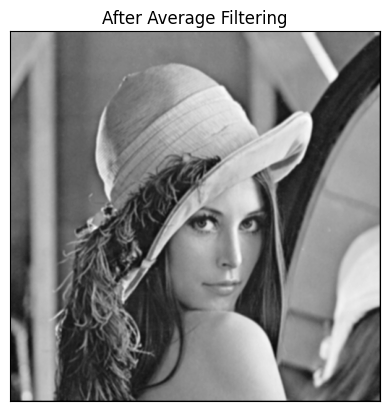

In [12]:
plt.imshow(convol_Avg, cmap='gray')
plt.title("After Average Filtering")
plt.xticks([])
plt.yticks([])
plt.show()

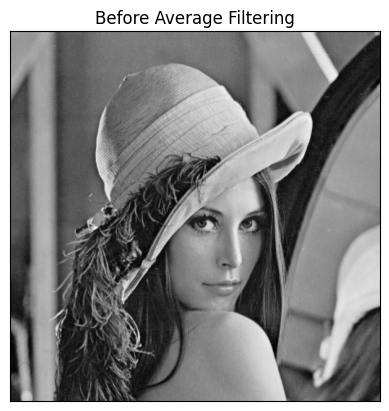

In [13]:
plt.imshow(img, cmap='gray')
plt.title("Before Average Filtering")
plt.xticks([])
plt.yticks([])
plt.show()

# Median filtering 

In [14]:
def medianFiltering(im):
    rows=im.shape[0]
    cols=im.shape[1]
    img = np.zeros((rows,cols), dtype='int')
    im = np.pad(im, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            list1=[im[i][j],im[i-1][j],im[i+1][j],im[i][j-1],im[i][j+1],im[i-1][j-1],im[i-1][j+1],im[i+1][j-1],im[i+1][j+1]]
            list1.sort()
            img[i][j]=list1[4]
    return img

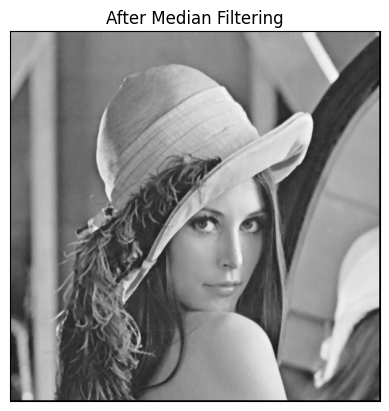

In [15]:
median = medianFiltering(img)
plt.imshow(median,cmap='gray')
plt.title("After Median Filtering")
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
img = cv.imread('CoverImages/lena.tiff',0)
impureLena = np.zeros((512,512), dtype=int)

In [17]:
for i in range(512):
    for j in range(512):
        if img[i][j] % 12 != 0:
            impureLena[i][j] = img[i][j]
    

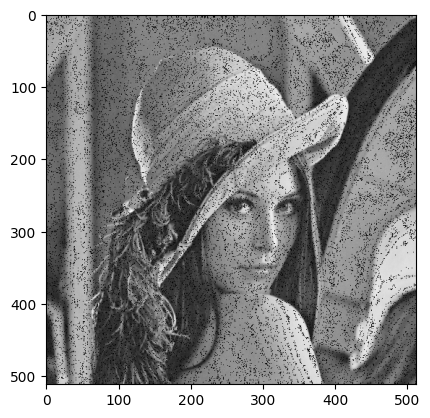

In [18]:
plt.imshow(impureLena, cmap='gray')
plt.show()

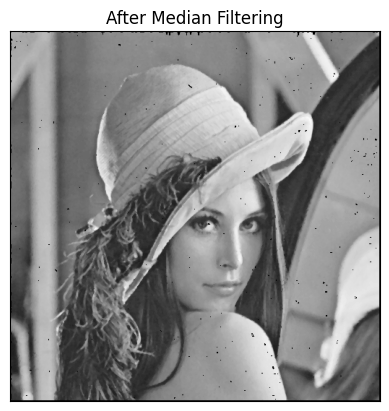

In [19]:
median = medianFiltering(impureLena)
plt.imshow(median,cmap='gray')
plt.title("After Median Filtering")
plt.xticks([])
plt.yticks([])
plt.show()